<b><font color= '#067F7D' style = 'font-family:verdana ; font-size:24px'>Problem Statement </font><b><br>
    
<font color="brown" style="font-family:Cambria ;font-size:18px">This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.
Like most other lending companies, lending loans to `‘risky’ applicants is the largest source of financial loss (called credit loss)`. Credit loss is the amount of money lost by the lender when the borrower `refuses to pay or runs away with the money owed`. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as `'charged-off'` are the `'defaulters'`. 
If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using `EDA is the aim of this case study`.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 
To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).</font>

<b><font color=black style = 'font-family:cambria; font-size:18px'>The `Lending Club Case Study`  Analysis is divided into 4 parts</font><b>
  
   - **1.<FONT COLOR='brown' >Reading And Understanding The Data</FONT>**
   - **2.<FONT COLOR='brown' >Data Understanding</FONT>**
        - **2.1 <FONT COLOR='purple' >Data Preparation</FONT>**
        - **2.2 <FONT COLOR='purple' >Missing Values Etc....</FONT>**
        - **2.3 <FONT COLOR='purple' >Outliers Handling</FONT>**
   - **3. <FONT COLOR='brown' >Exploratory Data Analysis (EDA)</FONT>**
        - **3.1 <FONT COLOR='purple' >Data Visualization</FONT>**
        - **3.2 <FONT COLOR='purple' >Advanced  Visualization</FONT>**
   - **4. <FONT COLOR='brown' >Recommendations</FONT>**
    
            
   
**THESE ARE THE SOME BASIC STEPS TO MAKE DATA CLEAN AND GOOD**   
    
<b>1.Data Understanding</b>
    - The Data Understanding Phase Is Essential Because It Lays The Foundation For Subsequent Steps In The Data Analysis Process
     It Involves Gaining A Comprehensive Understanding Of The Data You Are Working With.
<br>
<b>2.Data Cleaning</b>
    Data Cleaning Means Finding And Fixing Mistakes In Your Data So That It's Accurate And Easy To Work With. 
    This Is Important Because Clean Data Helps You Make Good Decisions And Get Reliable Results When You Analyze It
<br>
<b>3.Data Analysis </b>
     Data analysis is like solving a puzzle with information.
     You collect data, clean it up, and then look for patterns or answers to questions in that data.     It's like finding hidden treasures in a bunch of clues. <br>
<b>4.Recommendations</b>
      it refers to suggestions or advice. <br>

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', 120)
# pd.set_option('display.max_columns', 50)

In [3]:
# Reading Data
data=pd.read_csv("loan.csv")

## <u>Data understanding<u>

In [4]:
data.head(4)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                  0.0   
1                NaN            NaN               NaN                  0.0   
2                NaN            NaN               NaN                  0.0   
3                NaN            NaN               NaN                  0.0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0       0.0             NaN               NaN            NaN   
1       0.0             NaN               NaN            NaN   
2       0.0             NaN               NaN            NaN   
3       0.0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  

[4 rows x 111 columns]

In [5]:
# Finding The Shape Of Data
print(f'The Shape OF The Data Is {data.shape}')

The Shape OF The Data Is (39717, 111)


In [6]:
# Finding the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [7]:
# Using describe function
data.describe()

id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%        8975.000000    280.220000  5.900000e+04     13.400000   
75%       14400.000000    430.780000  8.230000e+04     18.600000   
max       35000.000000   1305.190000  6.000000e+06     29.990000   

        delinq_2yrs  inq_last_6mths  ...  num_tl_90g_dpd_24m  \
count  39717.000000    39717.000000  ...                 0.0   
mean       0.146512        0.869200  ...                 NaN   
std        0.491812        1.070219  ...                 NaN   
min        0.000000        0.000000  ...                 NaN   
25%        0.000000        0.000000  ...                 NaN   
50%        0.000000        1.000000  ...                 NaN   
75%        0.000000        1.000000  ...                 NaN   
max       11.000000        8.000000  ...                 NaN   

       num_tl_op_past_12m  pct_tl_nvr_dlq  percent_bc_gt_75  \
count                 0.0             0.0               0.0   
mean                  NaN             NaN               NaN   
std                   NaN             NaN               NaN   
min                   NaN             NaN               NaN   
25%                   NaN             NaN               NaN   
50%                   NaN             NaN               NaN   
75%                   NaN             NaN               NaN   
max                   NaN             NaN               NaN   

       pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  total_bal_ex_mort  \
count          39020.000000    39678.0              0.0                0.0   
mean               0.043260        0.0              NaN                NaN   
std                0.204324        0.0              NaN                NaN   
min                0.000000        0.0              NaN                NaN   
25%                0.000000        0.0              NaN                NaN   
50%                0.000000        0.0              NaN                NaN   
75%                0.000000        0.0              NaN                NaN   
max                2.000000        0.0              NaN                NaN   

       total_bc_limit  total_il_high_credit_limit  
count             0.0                         0.0  
mean              NaN                         NaN  
std               NaN                         NaN  
min               NaN                         NaN  
25%               NaN                         NaN  
50%               NaN                         NaN  
75%               NaN                         NaN  
max               NaN                         NaN  

[8 rows x 87 columns]

## <u> Data Cleaning<u>



<font color="brown" style ="font-family:Cambria ;font-size:20px"><b>1.Null Value</b></font><br>

<font color="black" style ="font-family:Cambria ;font-size:15px"><b>Here We Can Observe That `There Are So Many Columns Which Have Null Values & Most Of The Null Values are 100%` So We Have To Remove Them.If we observe that if a data set have more than 80% of null values depending upon the column if it is the important column we may fill null values if not just we remove them</b></font><br>



 

In [8]:
# # Finding The Null Values In Data with percentage
round(data.isnull().sum()/len(data)*100,2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [9]:

data.dropna(axis=1,how='all',inplace=True)
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... next_pymnt_d last_credit_pull_d  \
0   10.65%       162.87     B        B2  ...          NaN             May-16   
1   15.27%        59.83     C        C4  ...          NaN             Sep-13   
2   15.96%        84.33     C        C5  ...          NaN             May-16   
3   13.49%       339.31     C        C1  ...          NaN             Apr-16   
4   12.69%        67.79     B        B5  ...       Jun-16             May-16   

  collections_12_mths_ex_med  policy_code application_type acc_now_delinq  \
0                        0.0            1       INDIVIDUAL              0   
1                        0.0            1       INDIVIDUAL              0   
2                        0.0            1       INDIVIDUAL              0   
3                        0.0            1       INDIVIDUAL              0   
4                        0.0            1       INDIVIDUAL              0   

  chargeoff_within_12_mths delinq_amnt pub_rec_bankruptcies tax_liens  
0                      0.0           0                  0.0       0.0  
1                      0.0           0                  0.0       0.0  
2                      0.0           0                  0.0       0.0  
3                      0.0           0                  0.0       0.0  
4                      0.0           0                  0.0       0.0  

[5 rows x 57 columns]

In [10]:
print(f'After Dropping the Colums We Have The Shape {data.shape}')

After Dropping the Colums We Have The Shape (39717, 57)


 <font color="black" style ="font-family:Cambria ;font-size:20px"><b>There Are Some Columns Which Are Not Useful So Removing Them.Else It Effect Our Data Set </b></font><br>


In [11]:
data.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)

In [12]:
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... total_rec_prncp total_rec_int  \
0   10.65%       162.87     B        B2  ...         5000.00        863.16   
1   15.27%        59.83     C        C4  ...          456.46        435.17   
2   15.96%        84.33     C        C5  ...         2400.00        605.67   
3   13.49%       339.31     C        C1  ...        10000.00       2214.92   
4   12.69%        67.79     B        B5  ...         2475.94       1037.39   

  total_rec_late_fee  recoveries collection_recovery_fee last_pymnt_d  \
0               0.00        0.00                    0.00       Jan-15   
1               0.00      117.08                    1.11       Apr-13   
2               0.00        0.00                    0.00       Jun-14   
3              16.97        0.00                    0.00       Jan-15   
4               0.00        0.00                    0.00       May-16   

  last_pymnt_amnt next_pymnt_d last_credit_pull_d chargeoff_within_12_mths  
0          171.62          NaN             May-16                      0.0  
1          119.66          NaN             Sep-13                      0.0  
2          649.91          NaN             May-16                      0.0  
3          357.48          NaN             Apr-16                      0.0  
4           67.79       Jun-16             May-16                      0.0  

[5 rows x 48 columns]


#### After Droppping the unnecessary Columns which are not usefull to our analysis
###### Now we have 48 columns in this we can observe there is no need of  some columns:
for example:  
- id : everyone has own unique id so id is not usefull for analysis.
- title : this have title it is not usefull for our analysis.
- We Dont Need Loan Amount And Funded Amount Because Funded_Amount_Inv We Are Considering
- member id: member id is also  not usefull for analysis etc....
- emp_title : we don't need this column we don;t need the job title because we need only important varibles salary should be credited what ever should be job but it should be legal and should be verified by the bank
- zip_code : the zip code column is use less some people apply for loan when they need the loan they appply far away from the location 

In [13]:
pd.set_option('display.max_columns',48)


In [14]:
# so removing this columns
data.drop(["id","member_id","url","title","emp_title","zip_code", "last_credit_pull_d", "addr_state","desc","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"],axis=1,inplace=True)

In [15]:
data.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   
4      Current           other  17.94           Jan-96               0   

   open_acc  pub_rec revol_util  total_acc  
0         3        0     83.70%          9  
1         3        0      9.40%          4  
2         2        0     98.50%         10  
3        10        0        21%         37  
4        15        0     53.90%         38

In [16]:
print(f'The shape of the data set is {data.shape}')

The shape of the data set is (39717, 21)


In [17]:
# Now we can see the names of the remaining columns 
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### This 21 Columns Are Useful For Our Analysis


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

<font color="black" style ="font-family:Cambria ;font-size:20px"><b><i>"now the cleaning of null values has completed"</font></i></b><br>
<br>
<font color="purple" style ="font-family:Cambria ;font-size:20px"><b>2.Missing Values</b></font><br>
<br>
<font color="black" style ="font-size:15px"><b>Lets See For The Missing Values</b></font><br>



In [19]:
# Checking for missing values 
# checing the percentage of  missing values
round(data.isna().sum()/len(data.index)*100,2)

loan_amnt              0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_util             0.13
total_acc              0.00
dtype: float64

### Handling The Missing Values

- <i> we can observe that the 2 columns have missing values 1."emp_length ",2."revol_util". <i><br>
- <i> we can fill value of mode safely because the percentage of null value is very low. </i>
- <i>it does not affect the analysis much.</i>

In [20]:
print("mode of emp_lenth is:"+data.emp_length.mode()[0])

mode of emp_lenth is:10+ years


In [21]:
# filling the mode value to issing values
data.emp_length.fillna(data.emp_length.mode()[0],inplace=True)


In [22]:
data.emp_length.isna().sum()

0

In [23]:
data.revol_util.mode()[0]

'0%'

In [24]:
data.revol_util.fillna(data.revol_util.mode()[0],inplace=True)

In [25]:
data.revol_util.isna().sum()

0

In [26]:
round(data.isna().sum()/len(data.index)*100,1)

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

<b><i><font color="black" style ="font-family:Cambria ;font-size:20px">"Handling the missing values is completed"</font><i><b>
    




<font color="brown" style ="font-family:Cambria ;font-size:20px"><b>Searching For Outliers</font></b><br>

<font color="red"><b><i>Outliers Of "annual_inc":<i><b> </font>

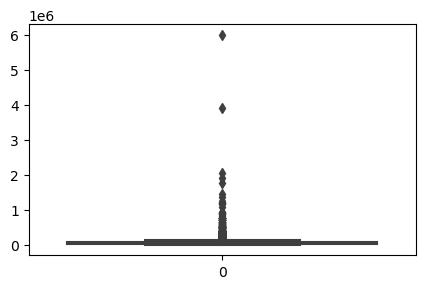

In [27]:
plt.figure(figsize=(5,3))
sns.boxplot(data['annual_inc'])
plt.show()

## <i>here clearly observed that outliers are present <i>

In [28]:
quant=data.annual_inc.quantile([0.5,0.75,0.90,0.95, 0.97,0.98, 0.99])

In [29]:
quant

0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64

In [30]:
annual_quant_95=data["annual_inc"].quantile(0.95)

In [31]:
# removing the outliers 
data=data[data.annual_inc<=annual_quant_95]

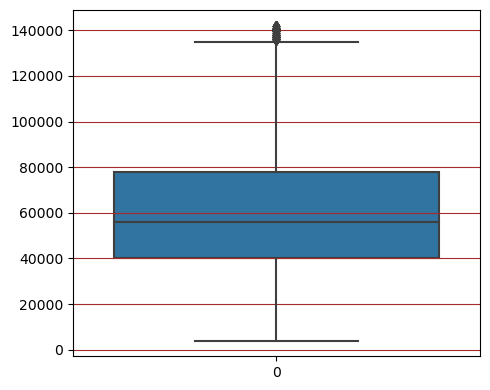

In [32]:
plt.figure(figsize=(5,4))



sns.boxplot(data.annual_inc)
# plt.yticks([i for i in range(0,15000,2000)],fontsize=8)
plt.grid(True, axis='y', linestyle='-', alpha=1,color='brown')
plt.tight_layout()


plt.show()

<font color="ash" style ="font-family:Cambria ;font-size:20px"><b>Outliers has been removed now "annual_inc" looks good and  the `median value may be 5000` and `q1 will be 4000` where has `q3 is 8000` </font></b><br>

<font color="red"><b><i>Outliers Of "loan_amount":<i><b> </font>

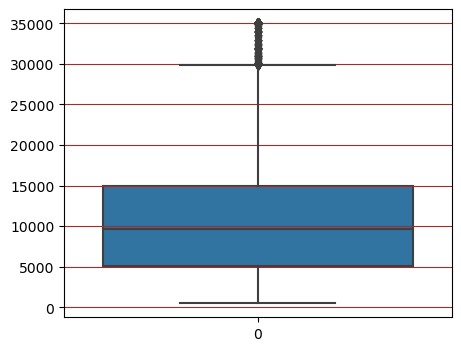

In [33]:
plt.figure(figsize=(5,4))

sns.boxplot(data.loan_amnt)
plt.grid(True, axis='y', linestyle='-', alpha=1,color='brown')

plt.show()

<font color='brown' style='font-family : cambria ;font-size:20px'> As you observe in the box plot are presentfrom 30k To 35k this may effect our data so we have to remove the outliers</font>

In [34]:
data.loan_amnt.quantile([0.25,0.50,0.75,0.95,0.97,0.98,0.99])

0.25     5075.0
0.50     9600.0
0.75    15000.0
0.95    25000.0
0.97    27000.0
0.98    30000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

In [35]:
data.loan_amnt.quantile(0.95)

25000.0

In [36]:
data1=data.loan_amnt.quantile(0.95)

In [37]:
data[data["loan_amnt"]<=data1].shape

(36484, 21)

In [38]:
# removing the outliers 
data=data[data["loan_amnt"]<=data1]

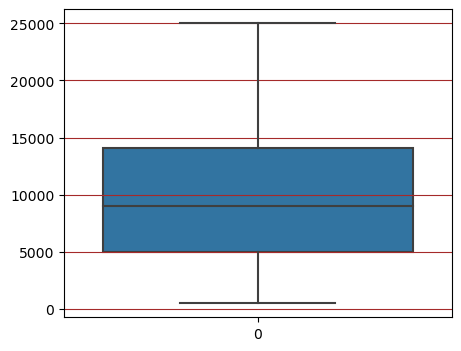

In [39]:
plt.figure(figsize=(5,4))

sns.boxplot(data["loan_amnt"])
plt.grid(True, axis='y', linestyle='-', alpha=1,color='brown')

plt.show()

<b><font color="ash" style="font-family:Cambria ;font-size:20px">Outliers has been removed now  "loan_amnt" is in good position and by observing the box plot we observe that the value of `q1 is 5000` and `median lies between 9000` and the value of `q3 is 14000` and `maximum is above 25000 near`</font></b>

<font color="red"><b><i>Outliers Of "funded_amnt_inv":<i><b> </font>

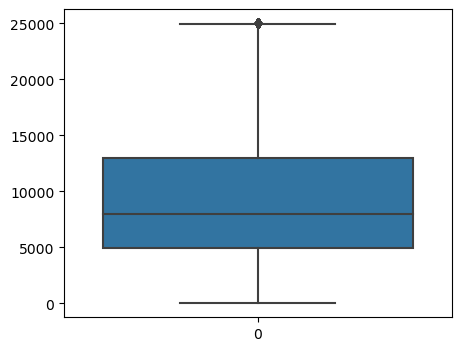

In [40]:
plt.figure(figsize=(5,4))
sns.boxplot(data.funded_amnt_inv)
plt.show()

In [41]:
data.funded_amnt_inv.quantile([0.25,0.50,0.75,0.95,0.97,0.98,0.99])

0.25     4975.000000
0.50     8000.000000
0.75    12975.000000
0.95    20775.000000
0.97    23618.028327
0.98    24225.000000
0.99    24900.000000
Name: funded_amnt_inv, dtype: float64

In [42]:
data2=data.funded_amnt_inv.quantile(0.95)

In [43]:
# removing the outliers 
data=data[data["funded_amnt_inv"]<=data2]

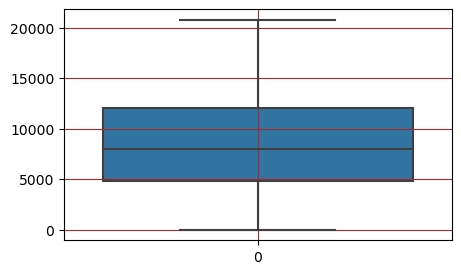

In [44]:
plt.figure(figsize=(5,3))
sns.boxplot(data["funded_amnt_inv"])
plt.grid(visible=True,ls='-',color='brown')
plt.show()

<b><font color="ash" style="font-family:Cambria ;font-size:20px">Outliers has been removed now  "funded_amnt_inv" is in good position</font></b>

## <u> Data visualization<u>

In [45]:
data.head()

loan_amnt  funded_amnt_inv        term int_rate  installment grade  \
0       5000           4975.0   36 months   10.65%       162.87     B   
1       2500           2500.0   60 months   15.27%        59.83     C   
2       2400           2400.0   36 months   15.96%        84.33     C   
3      10000          10000.0   36 months   13.49%       339.31     C   
4       3000           3000.0   60 months   12.69%        67.79     B   

  sub_grade emp_length home_ownership  annual_inc verification_status issue_d  \
0        B2  10+ years           RENT     24000.0            Verified  Dec-11   
1        C4   < 1 year           RENT     30000.0     Source Verified  Dec-11   
2        C5  10+ years           RENT     12252.0        Not Verified  Dec-11   
3        C1  10+ years           RENT     49200.0     Source Verified  Dec-11   
4        B5     1 year           RENT     80000.0     Source Verified  Dec-11   

   loan_status         purpose    dti earliest_cr_line  inq_last_6mths  \
0   Fully Paid     credit_card  27.65           Jan-85               1   
1  Charged Off             car   1.00           Apr-99               5   
2   Fully Paid  small_business   8.72           Nov-01               2   
3   Fully Paid           other  20.00           Feb-96               1   
4      Current           other  17.94           Jan-96               0   

   open_acc  pub_rec revol_util  total_acc  
0         3        0     83.70%          9  
1         3        0      9.40%          4  
2         2        0     98.50%         10  
3        10        0        21%         37  
4        15        0     53.90%         38


<b><font color="red" style="font-family:Cambria ;font-size:20px">displaying the boxplot of "funded amnt" and "loan amnt"</font></b>

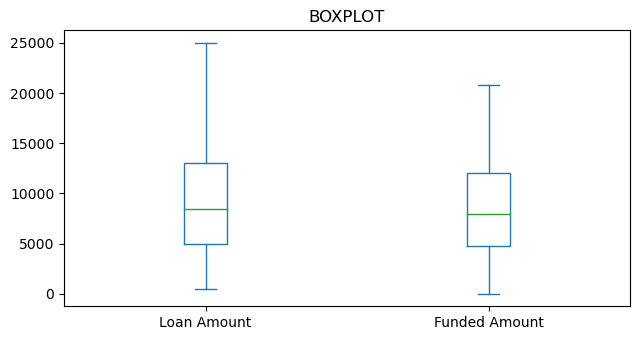

In [46]:
plt.rcParams["figure.figsize"] = [6.50, 3.50]
plt.rcParams["figure.autolayout"] = True


df=pd.DataFrame({"Loan Amount":data["loan_amnt"],"Funded Amount":data["funded_amnt_inv"]})
# plot the data frame 
ax=df[["Loan Amount","Funded Amount"]].plot(kind="box",title='BOXPLOT')
# DISPLAYING THE PLOT
plt.show()

<b><font color="BROWN" style="font-family:Cambria ;font-size:20px">We have to rename the column from "TERM" to "TERM_IN_MONTH"</font></b>
- <FONT COLOR='TEAL'>**PERFORMING THE TYPE CASTING FOR TERM COLUMN**</FONT>
- <FONT COLOR='TEAL'> **EXTRACTING ONLY NUMARICAL VLAUES AND CONVERTING THEM IN TO INT**</FONT>

In [47]:
data.rename(columns={"term":"term_in_month"},inplace=True)

In [48]:
data["term_in_month"]=data["term_in_month"].apply(lambda x :int(x[1:3]))

In [49]:
data["term_in_month"].info()

<class 'pandas.core.series.Series'>
Int64Index: 34660 entries, 0 to 39716
Series name: term_in_month
Non-Null Count  Dtype
--------------  -----
34660 non-null  int64
dtypes: int64(1)
memory usage: 1.5 MB



<b><FONT COLOR='TEAL'>**Here we see that the type has changed to int**</FONT><b>

### Univariate And Bivariated
- <FONT COLOR=DarkCyan> **Here we plot some graphs like histogram,boxplot,scatterplot etc...** </FONT>
-<FONT COLOR=DarkCyan>**We can also performs:**</FONT>
  - <FONT COLOR=BLACK>**CATEGORICAL TO CATEGORICAL** </FONT>
  - <FONT COLOR=BLACK> **CATEGORICAL TO NUMERICAL** </FONT>
  - <FONT COLOR=BLACK> **NUMERICAL TO CATEGOTICAL** </FONT>
  - <FONT COLOR=BLACK> **NUMERICAL TO NUMERICAL** </FONT>

### Performing House Ownership

In [50]:
#checking unique values for home_ownership
data["home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [51]:
data["home_ownership"].value_counts()

RENT        17419
MORTGAGE    14399
OWN          2746
OTHER          93
NONE            3
Name: home_ownership, dtype: int64

<b>we have "3" none values so replacing the "none" value with "other"<b>

In [52]:
# replacing none with other
data["home_ownership"].replace(to_replace="NONE",value="OTHER",inplace=True)

In [53]:
data["home_ownership"].value_counts()

RENT        17419
MORTGAGE    14399
OWN          2746
OTHER          96
Name: home_ownership, dtype: int64

<b>now there is no "none" values<b>

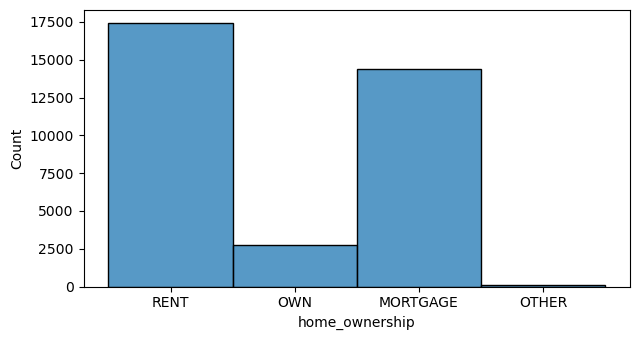

In [54]:
# plotting histplot of home_ownership
sns.histplot(data=data,x=data["home_ownership"])
plt.show()

<i><b>From Above Plot We Observed That Most Of The Members Has Rent Houses Upto Apx 17500,Own Houses Are Upto Apx 2500 And Mortgage Houses Are Upto Apx between 12500 to 15000 <b><i>

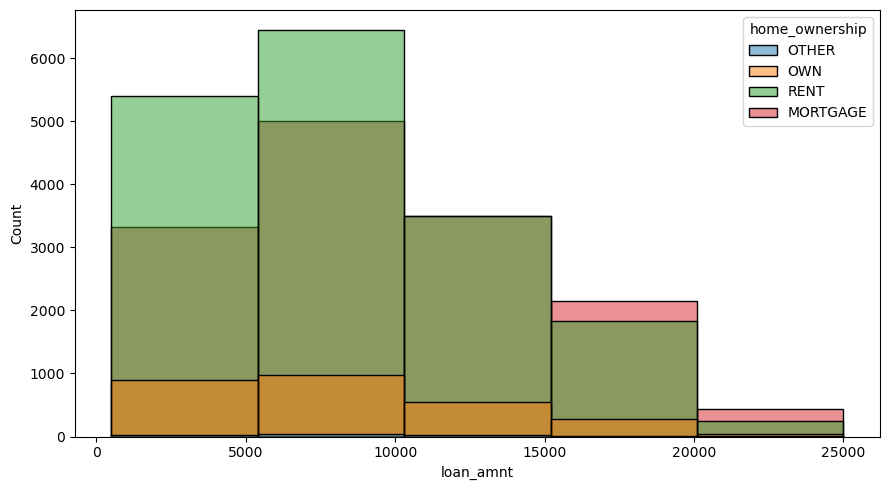

In [55]:
# plotting hist on loan amnt and home ownership
plt.figure(figsize=(9,5))
sns.histplot(data=data,x=data['loan_amnt'],bins=5,hue=data["home_ownership"],hue_order=['OTHER','OWN','RENT','MORTGAGE'])
plt.show()

<font color="brown" style ="font-family:Cambria ;font-size:20px"><b></b>As We See That The People Having Own House Has Less Loan Amount And The People Who Has Mortage Also Has Less Loan Amount But The People Who Has  Rent Houses Has some what increase the loan amnt compared to them </font>

### <B>CHECKING THE LOAN STATUS<B>

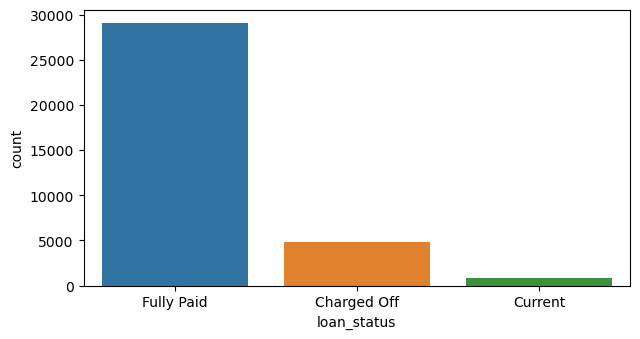

In [56]:
sns.countplot(x=data["loan_status"])
plt.show()

###### <b>As we observed from above plot that the person who fully paid are more and the person with current status are very few so we have to remove these rows.

In [57]:
# removing the current rows
data=data.loc[data['loan_status']!='Current']

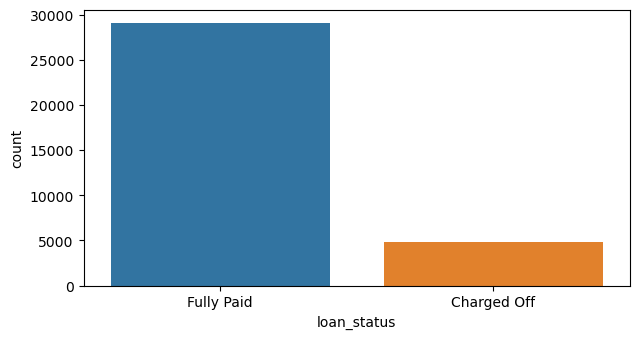

In [58]:
# plotting the loan status
sns.countplot(x=data["loan_status"])
plt.show()

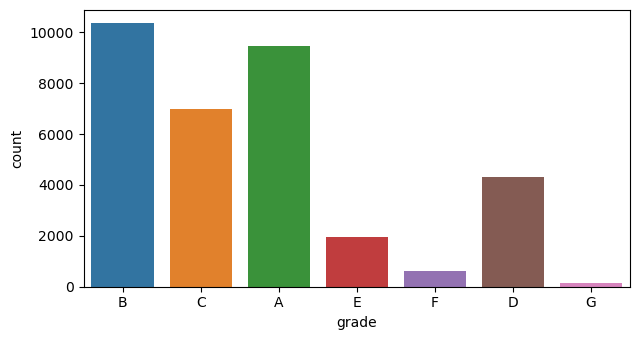

In [59]:
# pltotting the 'grade '
sns.countplot(x=data['grade'], data=data)
plt.show()

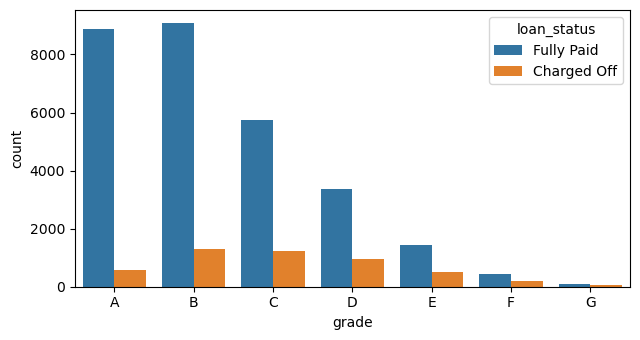

MAJORITY OF THE MEMBERS HAVE PAID THE LOAN WHERE AHAS FOR EACH GRADE THERE ARE SOME CHARGED OFF


In [60]:
sns.countplot(x=data['grade'],hue=data["loan_status"],order=['A','B','C','D','E','F','G'],data=data)
plt.show()
print('MAJORITY OF THE MEMBERS HAVE PAID THE LOAN WHERE AHAS FOR EACH GRADE THERE ARE SOME CHARGED OFF')

### As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

In [61]:
data["sub_grade"]=pd.to_numeric(data['sub_grade'].apply(lambda x:x[-1]))
data.sub_grade.head()

0    2
1    4
2    5
3    1
5    4
Name: sub_grade, dtype: int64

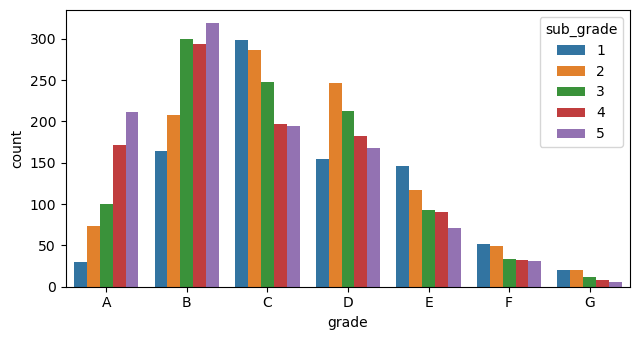

In [62]:
sns.countplot(x='grade',order=['A','B','C','D','E','F','G'],hue='sub_grade',data=data[data['loan_status']=='Charged Off'])
plt.show()

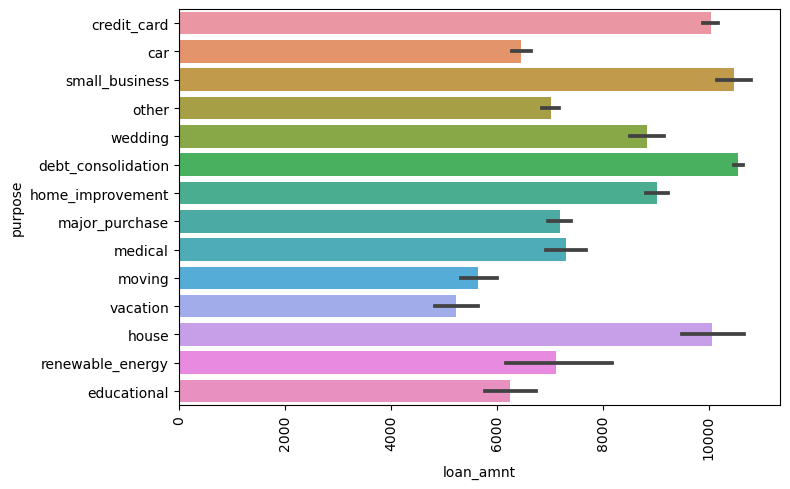

In [63]:
# plotting graph of purpose and loan amount
plt.figure(figsize=(8,5))
sns.barplot(y=data['purpose'],x=data['loan_amnt'],data=data)
plt.xticks(rotation=90)
plt.show()

- <b>The main purpose of high loan is for 'small business','debt_consolidation','credit_card' and 'house purpose<b>
- <b>the least loan amount is for 'vacation' and 'moving' purpose.<b>    

## Multivariate Analysis

In [64]:
# first we create cont_cols of numerical data
cont=['funded_amnt_inv','emp_length','annual_inc','loan_amnt',]

<Figure size 1000x500 with 0 Axes>

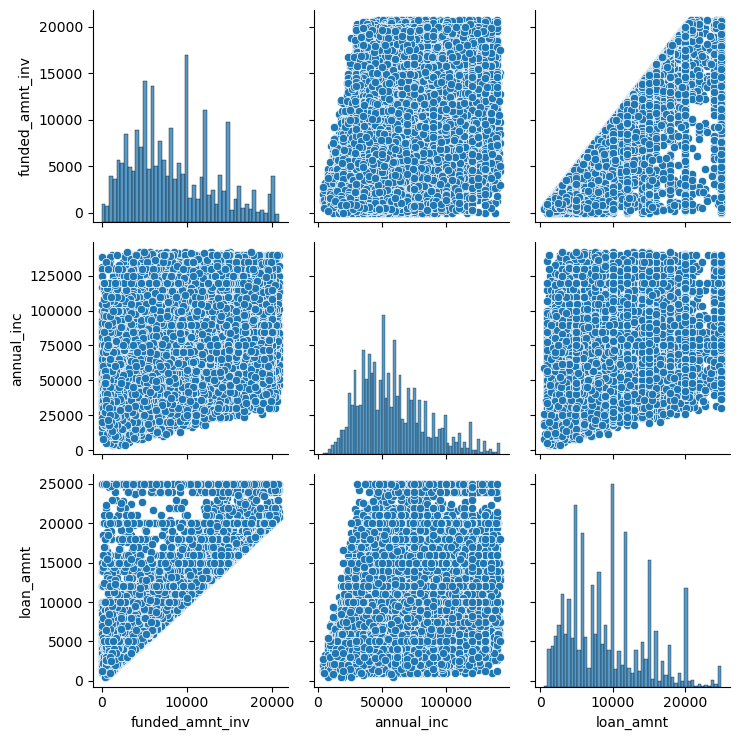

In [65]:
# plotting pair plot of cont_cols
plt.figure(figsize=(10,5))
sns.pairplot(data[cont])
plt.show()

- <b> In above we performed multivariated analysis <b>

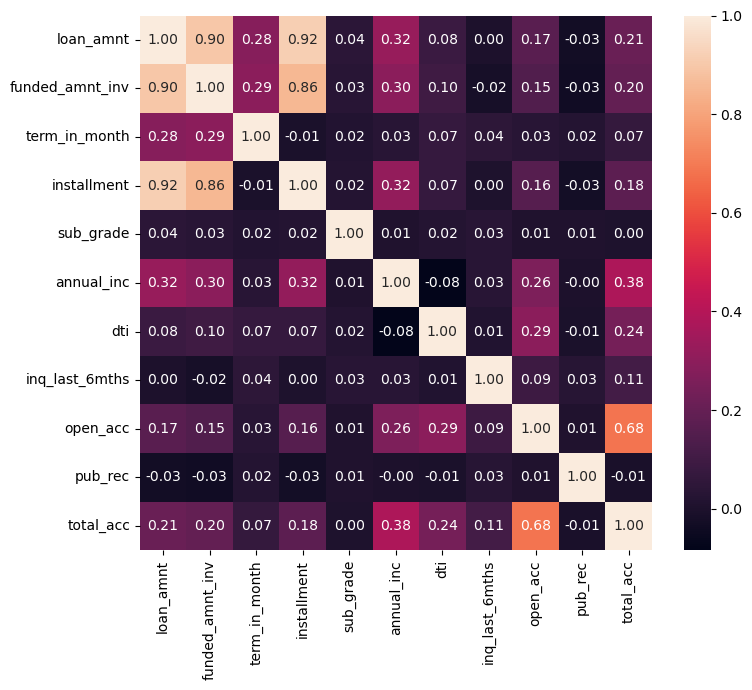

In [66]:
# performing heat map
plt.figure(figsize=(8,7))
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

<b><font color="brown" style="font-family:Cambria ;font-size:20px">Positive Correlation And Negative colrrelation </font></b>
- <font color="teal"><b>loan amount and installments are highly positively correlated <b></font>
- <font color="teal"><b>dti and annual_inc are highly negatively correlated <b></font>    

### Creating Some Columns Into Buckets 

In [67]:
# removing "%" from int_rate
data["int_rate"]= data['int_rate'].str.replace('%',' ')

In [68]:
# coverting into float
data['int_rate']=data['int_rate'].astype('float64') 

In [69]:
data['interest in group']=pd.cut(x=data['int_rate'],bins=5,precision=0,labels=['5%-10%','10%-14%','14%-18%','18%-22%','22%-24%'])

In [70]:
# another way of removing 
# data["int_rate"]=data['int_rate'].apply(lambda x: x[:-1] if x.endswith('%') else x)

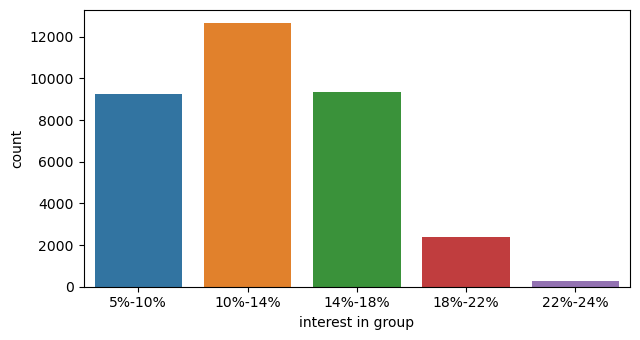

In [71]:
sns.countplot(x=data['interest in group'],data=data['loan_status'])
plt.show()

In [72]:
# creating   buckets 
data['inq_in_bins']=pd.cut(x=data['inq_last_6mths'],bins=4,labels=['0-2','2-4','4-6','6-8'])

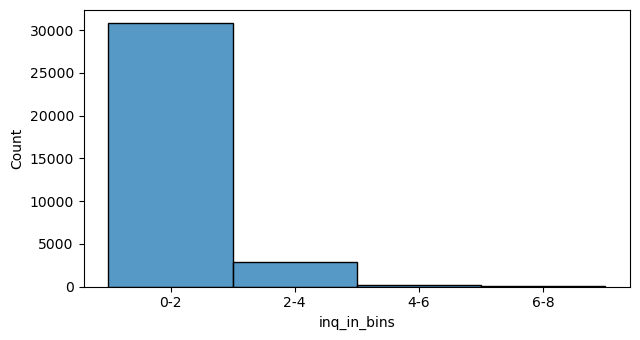

In [73]:
# plottng histplot 
sns.histplot(data=data["loan_status"],x=data['inq_in_bins'])
plt.show()

In [74]:
data.head(4)

loan_amnt  funded_amnt_inv  term_in_month  int_rate  installment grade  \
0       5000           4975.0             36     10.65       162.87     B   
1       2500           2500.0             60     15.27        59.83     C   
2       2400           2400.0             36     15.96        84.33     C   
3      10000          10000.0             36     13.49       339.31     C   

   sub_grade emp_length home_ownership  annual_inc verification_status  \
0          2  10+ years           RENT     24000.0            Verified   
1          4   < 1 year           RENT     30000.0     Source Verified   
2          5  10+ years           RENT     12252.0        Not Verified   
3          1  10+ years           RENT     49200.0     Source Verified   

  issue_d  loan_status         purpose    dti earliest_cr_line  \
0  Dec-11   Fully Paid     credit_card  27.65           Jan-85   
1  Dec-11  Charged Off             car   1.00           Apr-99   
2  Dec-11   Fully Paid  small_business   8.72           Nov-01   
3  Dec-11   Fully Paid           other  20.00           Feb-96   

   inq_last_6mths  open_acc  pub_rec revol_util  total_acc interest in group  \
0               1         3        0     83.70%          9           10%-14%   
1               5         3        0      9.40%          4           14%-18%   
2               2         2        0     98.50%         10           14%-18%   
3               1        10        0        21%         37           14%-18%   

  inq_in_bins  
0         0-2  
1         4-6  
2         0-2  
3         0-2

  <b>WE HAVE TO CONVERT COLUMN 'ISSUE_D' IN TO TWO COLUMNS I.E YEAR AND MONTH<b>

In [75]:
data3=data['issue_d'].str.partition('-',True)
data["issue_d_month"]=data3[0]
data["isssue_d_year"]='20'+data3[2]

In [76]:
data['isssue_d_year'].value_counts()

2011    17384
2010    10406
2009     4361
2008     1489
2007      230
Name: isssue_d_year, dtype: int64

- <b> Most Of The Persons Taken Loan In The Year '2011'<b>

### <b><font color="brown"> Analysing The 'Installment','Funded_amnt_inv','Loan_Amnt','Dti'. Columns</font><b>

- First Converting into buckets

In [77]:
data['annual_inc_in_group'] =pd.cut(x=data['annual_inc'],bins=7,labels=['3k-24k','24k-44k','44k-64','64k-84k','84k-104k','104k-124k','124k-135k'])
data['installment_groups']=pd.cut(data['installment'],bins=10,precision=0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
data["funded_amnt_inv_group"]=pd.cut(data["funded_amnt_inv"],bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['loan_amnt_groups'] = pd.cut(data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
data['dti_groups'] = pd.cut(data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

In [78]:
import plotly.express as px

In [79]:
# plotting the scatterplot of 4 columns
px.scatter(data_frame=data,x=data['installment_groups'],y=data["funded_amnt_inv_group"],color=data['loan_amnt_groups'],symbol=data['dti_groups'])

##### From The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when:
- MOST OF THER ARE 36MONTHS
- INTEREST RATE IS IN BETWEEN  13-17
- INSTALLMENT GROUP IS HIGH FROM 142-274

### <font color="teal"> Analysing each individual  column  'Installment' ,'Funded_amnt_inv' ,'Loan_Amnt' ,'Dti'  with 'loan_sts'</font>

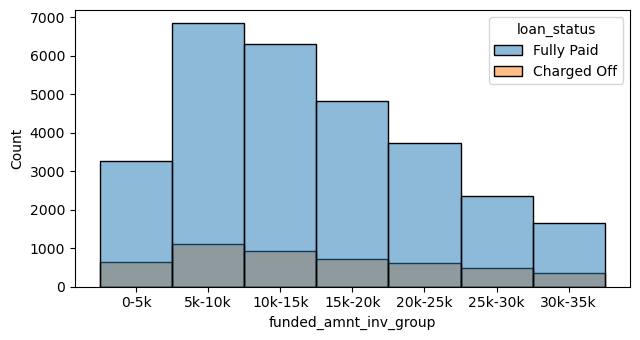

In [80]:
# pl0tting graph 'funded_amnt_inv_group' with' loan_status'
sns.histplot(x=data['funded_amnt_inv_group'],hue=data['loan_status'])
plt.show()

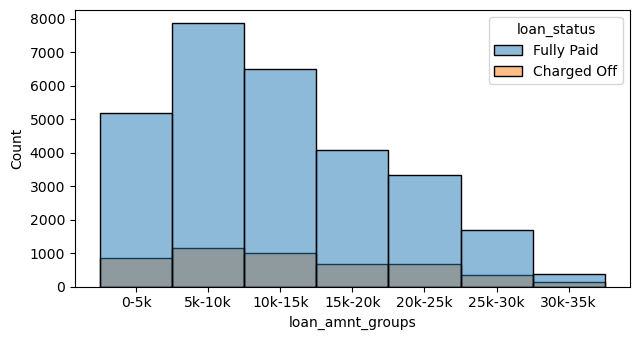

In [81]:
# plotting graph 'loan_amnt_groups with' loan_status'
sns.histplot(x=data['loan_amnt_groups'],hue=data['loan_status'])
plt.show()

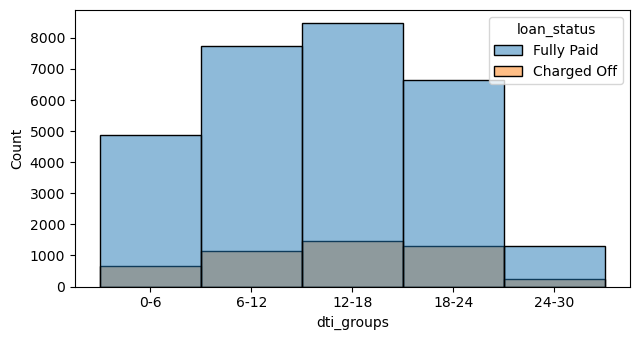

In [82]:
# plotting graph 'dti_groups with' loan_status'
sns.histplot(x=data['dti_groups'],hue=data['loan_status'])
plt.show()

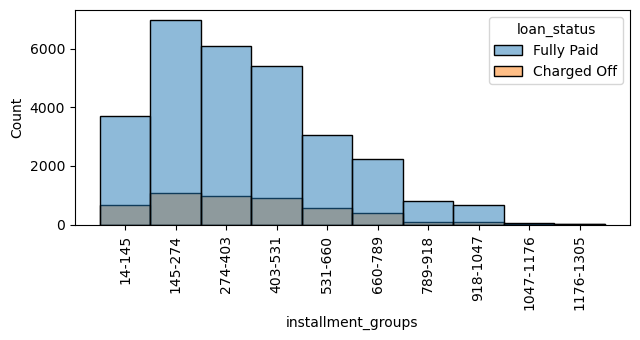

In [83]:
# plotting graph 'installment_groups with' loan_status'
sns.histplot(x=data['installment_groups'],hue=data['loan_status'])
plt.xticks(rotation=90)
plt.show()

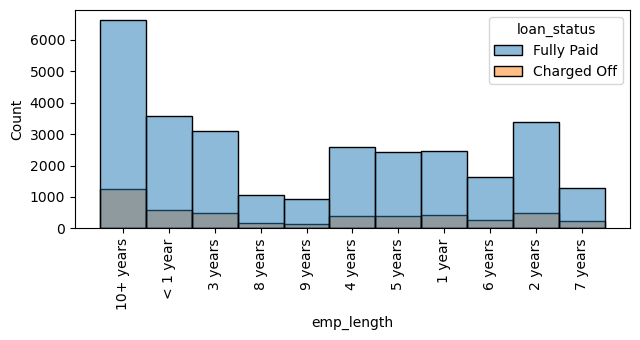

In [84]:
# plotting graph 'emp_length with' loan_status'
sns.histplot(x=data['emp_length'],hue=data['loan_status'])
plt.xticks(rotation=90)
plt.show()

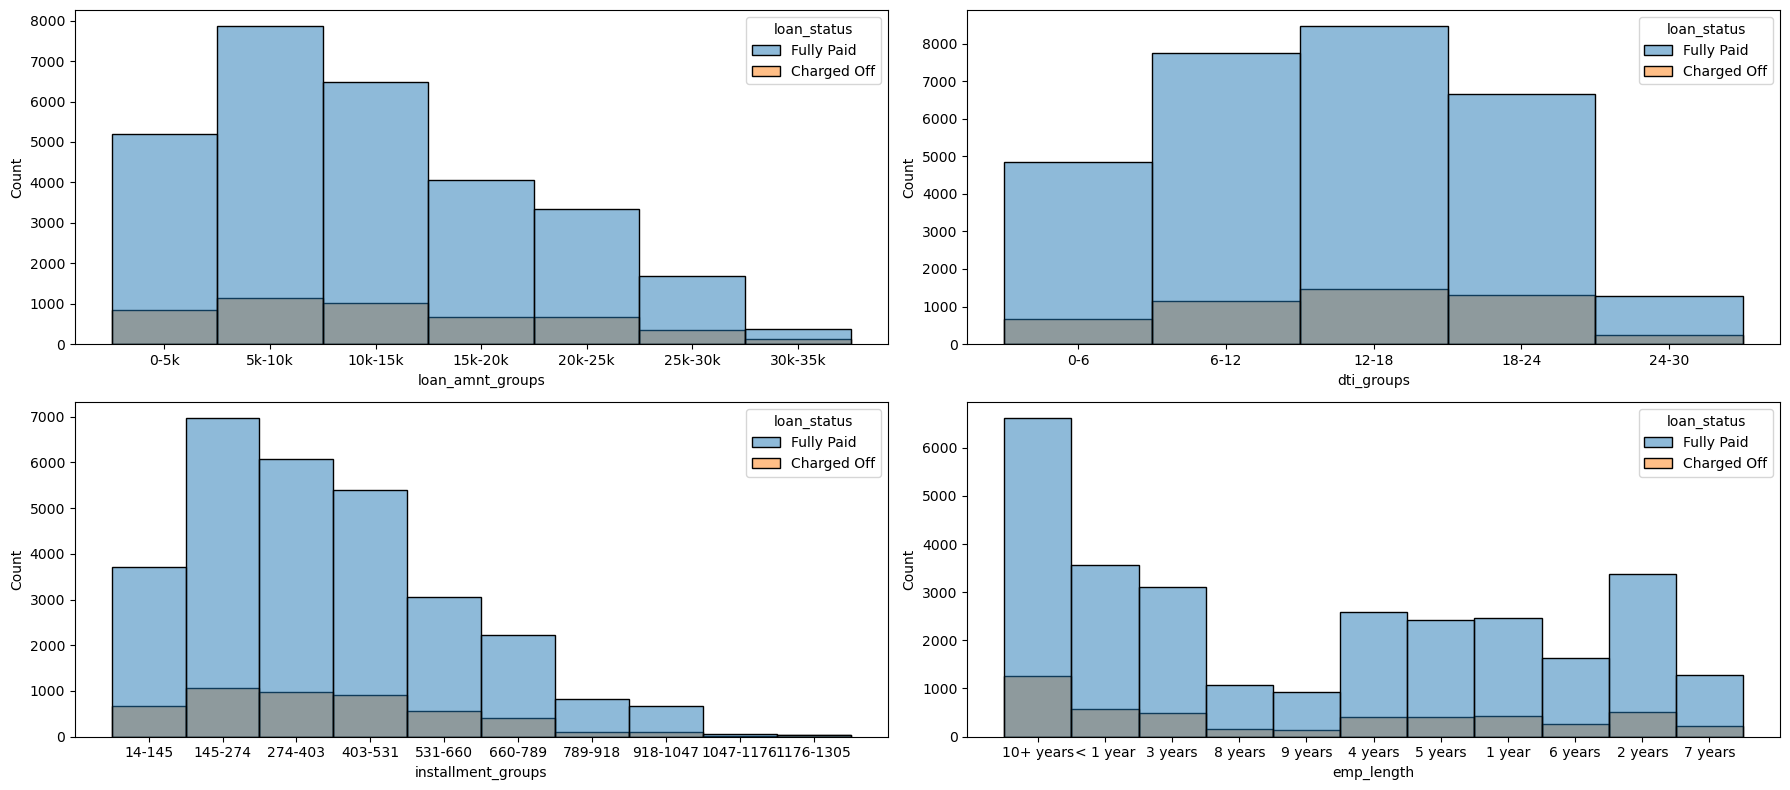

In [85]:
# all sub plots of above plots
plt.figure(figsize=(18,8))
plt.subplot(2,2,1)
sns.histplot(x=data['loan_amnt_groups'],hue=data['loan_status'])
plt.subplot(2,2,2)
sns.histplot(x=data['dti_groups'],hue=data['loan_status'])

plt.subplot(2,2,3)
sns.histplot(x=data['installment_groups'],hue=data['loan_status'])

plt.subplot(2,2,4)
sns.histplot(x=data['emp_length'],hue=data['loan_status'])

plt.show()

### <i>ANNUAL INCOME VS LOAN AMOUNT<i>

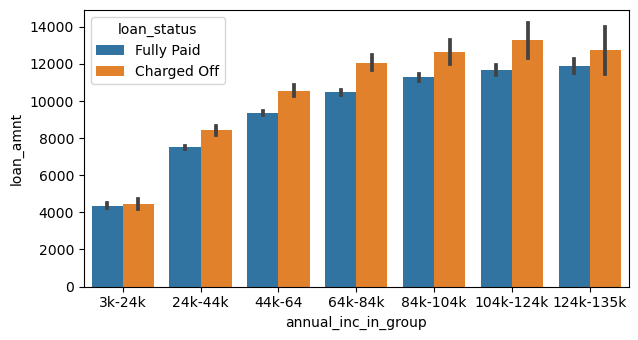

In [86]:
sns.barplot(x="annual_inc_in_group",y="loan_amnt",hue='loan_status',data=data)
plt.show()

### ANNUAL INCOME VS PURPOSE

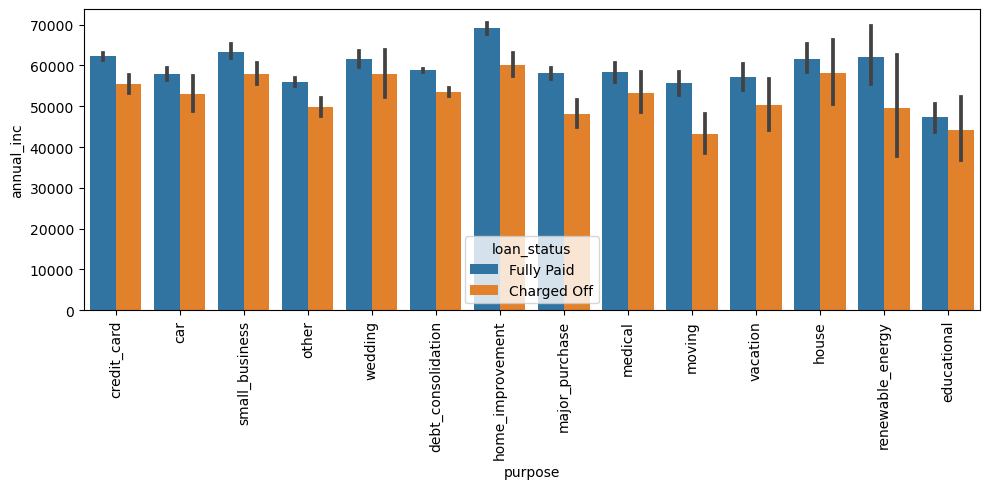

In [87]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,y='annual_inc',x="purpose",hue="loan_status")
plt.xticks(rotation=90)
plt.show()

### LOAN AMOUNT VS PURPOSE

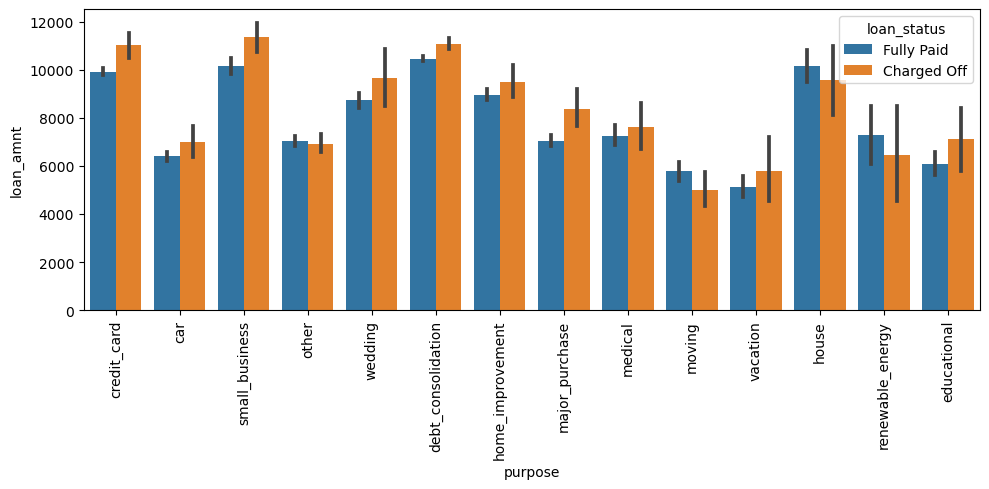

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(data=data,x="purpose",y="loan_amnt",hue="loan_status")
plt.xticks(rotation=90)
plt.show()

### HOUSE_OWNER_SHIP VS LOAN_AMOUNT 

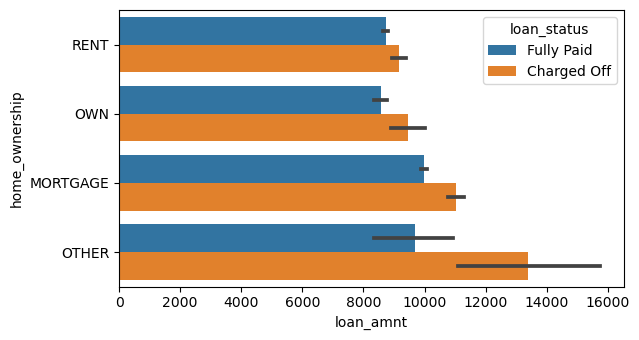

In [89]:
sns.barplot(data=data,x='loan_amnt',y="home_ownership",hue="loan_status")
plt.show()

### ALL CATEGORICAL TO CATEGORICAL ANALYSIS 

In [90]:
data['isssue_d_year'] =pd.to_numeric(data['isssue_d_year'])

In [91]:
data['isssue_d_year_group'] = pd.cut(x=data['isssue_d_year'],bins=2,labels=['2007-2009','2009-2011'])

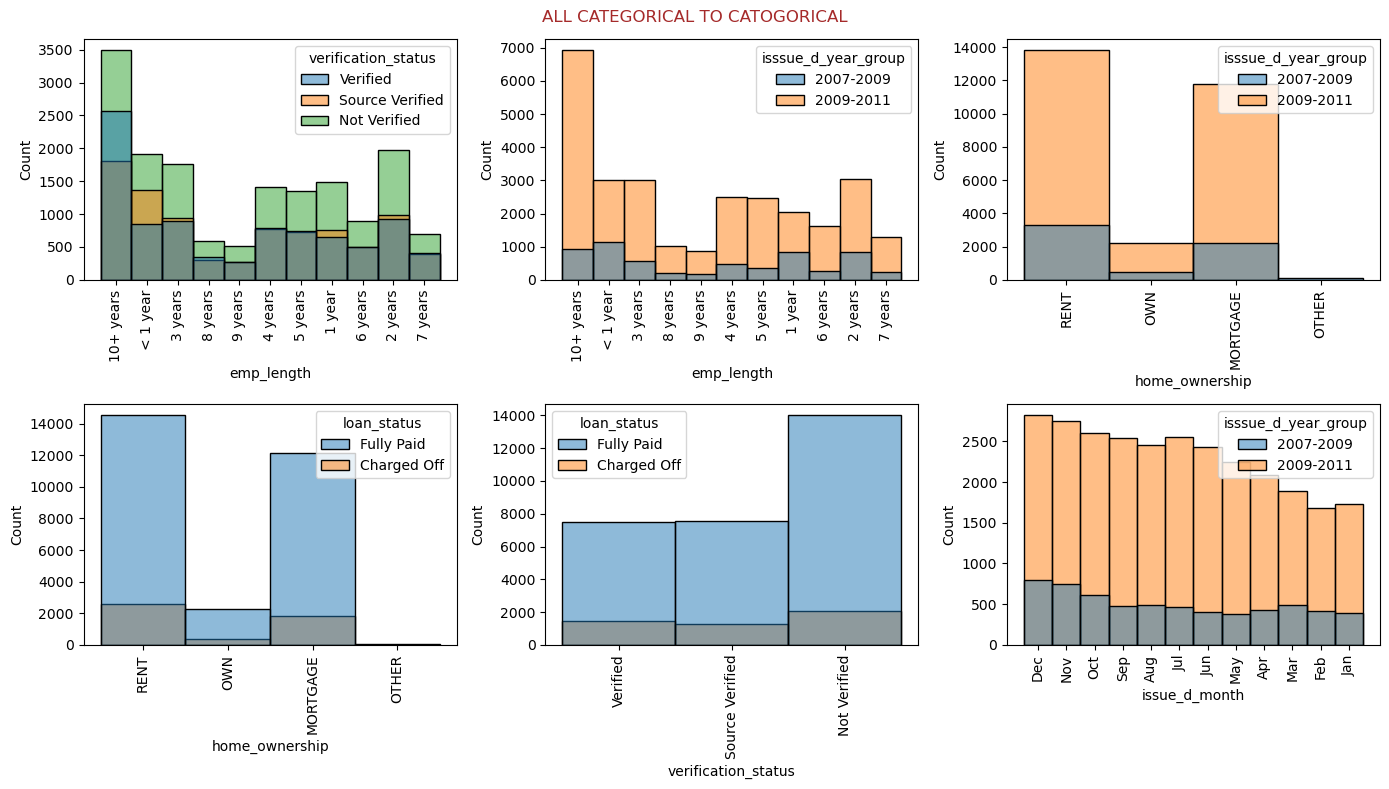

In [92]:
plt.figure(figsize=(14,8))

plt.subplot(2,3,1)
plt.suptitle('ALL CATEGORICAL TO CATOGORICAL',color='brown')

sns.histplot(x=data['emp_length'],hue=data['verification_status'])
plt.xticks(rotation=90)

# ---------------------------------------------------------------------------------------
plt.subplot(2,3,2)
sns.histplot(x=data['emp_length'],hue=data['isssue_d_year_group'])
plt.xticks(rotation=90)


# ---------------------------------------------------------------------------------------
plt.subplot(2,3,3)
sns.histplot(x=data['home_ownership'],hue=data['isssue_d_year_group'])
plt.xticks(rotation=90)


# ---------------------------------------------------------------------------------------
plt.subplot(2,3,4)
sns.histplot(x=data['home_ownership'],hue=data['loan_status'])
plt.xticks(rotation=90)

# ---------------------------------------------------------------------------------------
plt.subplot(2,3,5)
sns.histplot(x=data['verification_status'],hue=data['loan_status'])
plt.xticks(rotation=90)

# ---------------------------------------------------------------------------------------
plt.subplot(2,3,6)
sns.histplot(data=data,x=data['issue_d_month'],hue=data['isssue_d_year_group'])
plt.xticks(rotation=90)

plt.show()
# ---------------------------------------------------------------------------------------


- **From the above plot we observed that they are very less number of verified and many of the are not verified and also many people while taking a loan they have choose the loan repayment time is 10+ years**

- **From the 2nd subplot we observed that most of the loans are in between `2009-2011` very less loans are taking in between the `2007-2009`**

- **From the subplot those who have taken loan most of the peoples are from `Rent House and MOrtgage` There are very less member in own house** 
- **majority of the peoples are loan fully paid rent and mortgage are fully paid loans they don't comes under default loan**
- **most of the peoples who applied for loan are not verified we have to verify them**
- **the loans are quite high in dec,nov,oct,sep**

### All Numerical  To Numerical Analysis

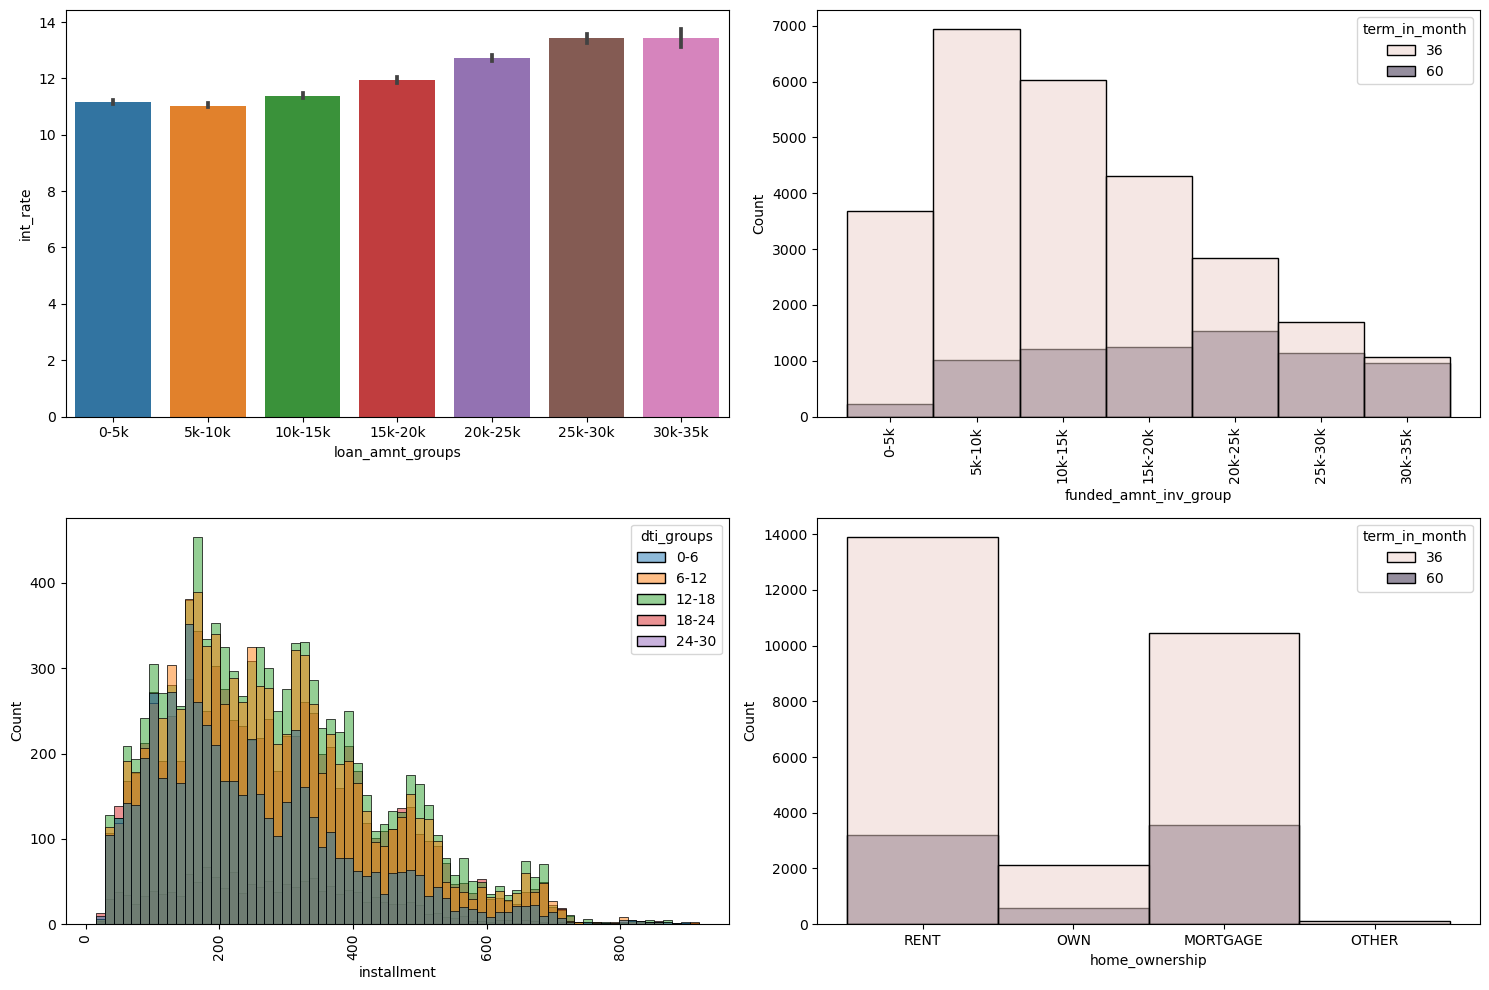

In [93]:

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=data,x=data["loan_amnt_groups"],y=data['int_rate'])
# plt.xticks(rotation=90)
# .......................
plt.subplot(2,2,2)
sns.histplot(data=data,x=data["funded_amnt_inv_group"],hue=data['term_in_month'])
plt.xticks(rotation=90)
# ................................
plt.subplot(2,2,3)
sns.histplot(data=data,x=data["installment"],hue=data['dti_groups'])
plt.xticks(rotation=90)
# ..................................
plt.subplot(2,2,4)
sns.histplot(data=data,x=data['home_ownership'],hue=data['term_in_month'])


plt.show()

- **Loan amount is frome 1000 to 30000 and the intrest rate is very high even the loan amount is low and those who have taken loan in 30000 to 35000 the intrest rate is quit high**
- **Those who have taken the loan have choosen the 36 months and very less people are 60 months**

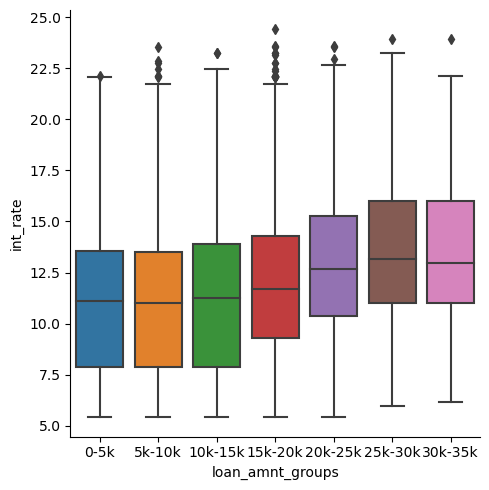

In [94]:
# plotting the catplot of int_rate and loan_amnt_groups
sns.catplot(data =data,y ='int_rate', x ='loan_amnt_groups',kind = 'box')
plt.show()

- **The min loan amount group is 6.0 and min amount up to 15000 is 7.5 intrest and rest of them are quit high in median case also upto 15k we have same value which might be 11.5 and rest of them are 12 and may be 12.5 and the uppper quatile which 75% quatile is 13.5 and loam amount in between 20000 to 35000 the intrest rate is 15 %**

- **The amount from 5k to 10k and 15000 to 20000 , when they need the loan they have choosen 23.5 there are some outliers**

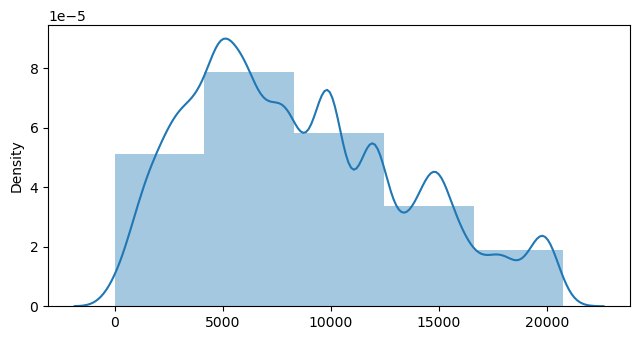

In [95]:
sns.distplot(a=data[["funded_amnt_inv"]],bins=5,hist=True)
plt.show()

In [96]:
purpose=pd.DataFrame(round(data['purpose'].value_counts()/len(data)*100,2)[0:10]).reset_index()

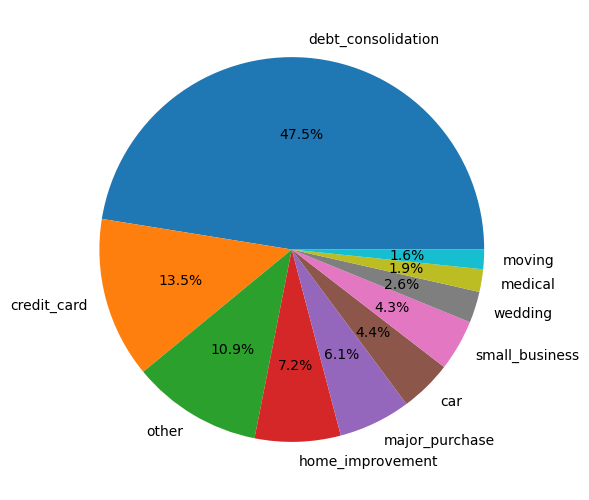

In [97]:
plt.figure(figsize=(6,6))  # Set the figure size to 8x8 inches)
plt.pie(x=round(data['purpose'].value_counts()/len(data)*100,2)[0:10],autopct='%1.1f%%',labels=purpose['index'])
plt.show()

In [98]:
grade=pd.DataFrame(round(data['grade'].value_counts()/len(data)*100,2)).reset_index()


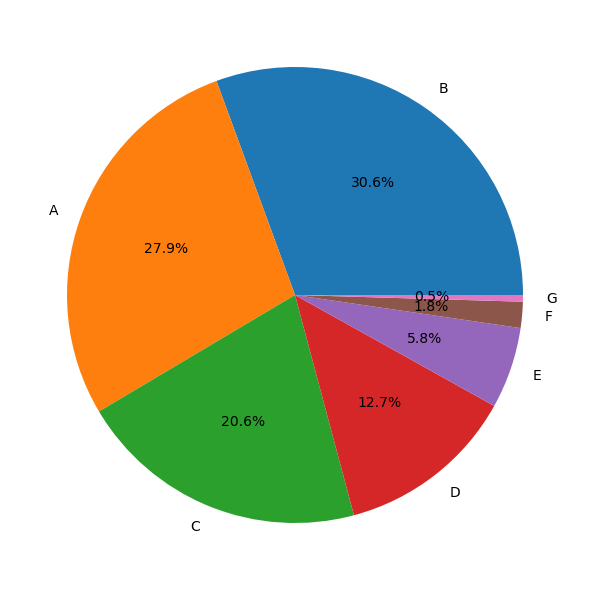

In [99]:
plt.figure(figsize=(6,6))  # Set the figure size to 8x8 inches)
plt.pie(x=round(data['grade'].value_counts()/len(data)*100,2),autopct='%1.1f%%',labels=grade['index'])
plt.show()

In [100]:
group=data.groupby(['purpose'])['grade'].value_counts(normalize=True).unstack(fill_value=0)

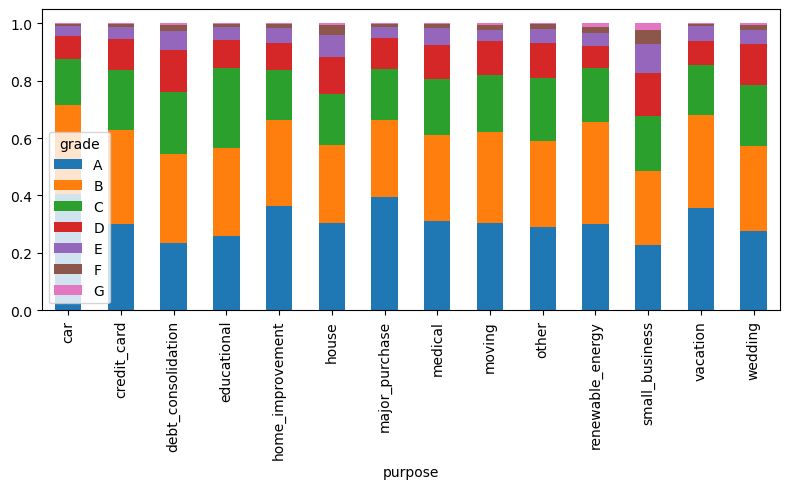

In [101]:
group.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.show()

## OBSERVATION:
- When employment length is 10yrs and loan amount is 12k-14k
- When the loan is verified and loan amount is above 16k
- For grade G and interest rate above 20%
- Applicants who receive interest at the rate of 21-24% and have an income of 70k-80k
- Applicants who have taken a loan in the range 30k - 35k and are charged interest rate of 15-17.5 %
- Applicants who have taken a loan for small business and the loan amount is greater than 14k
- Low Annual Income Has Low Funded Amount
- If we compare to loan amount vs purpose most of the cases there are eqully paid and charged off
- If we perform various columns analysis we came to know that there is no diffenece is fully paid and charged off
- The intrest rate is very high 